In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("D:\TaiLieu\KhaiPhaDuLieu\BaiTapLon\TapDuLieu\diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.isna().any()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

In [5]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
df.duplicated().sum()

3854

In [5]:
df.drop_duplicates(inplace=True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df['diabetes'].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

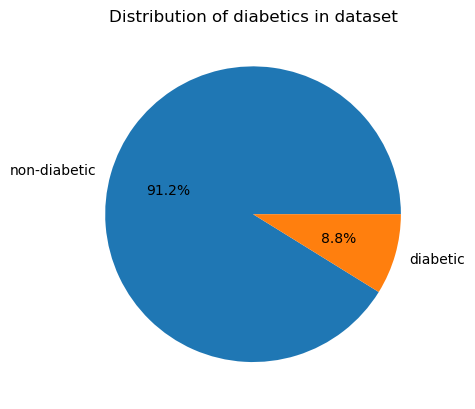

In [10]:
plt.pie(df['diabetes'].value_counts(), labels = ['non-diabetic', 'diabetic'],
       autopct = '%1.1f%%')
plt.title("Distribution of diabetics in dataset")
plt.show()

In [11]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


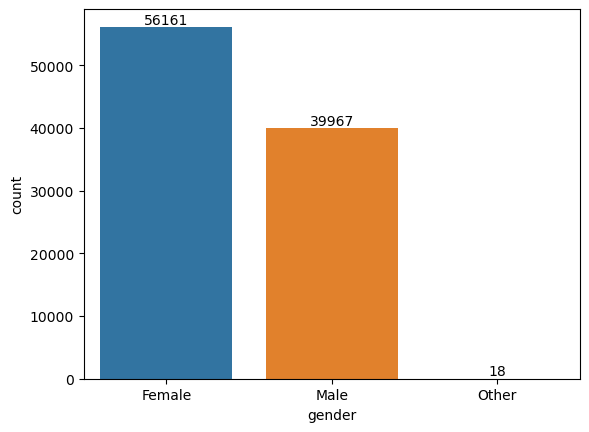

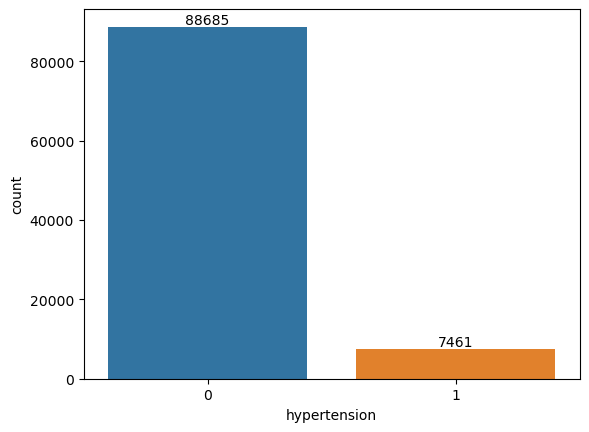

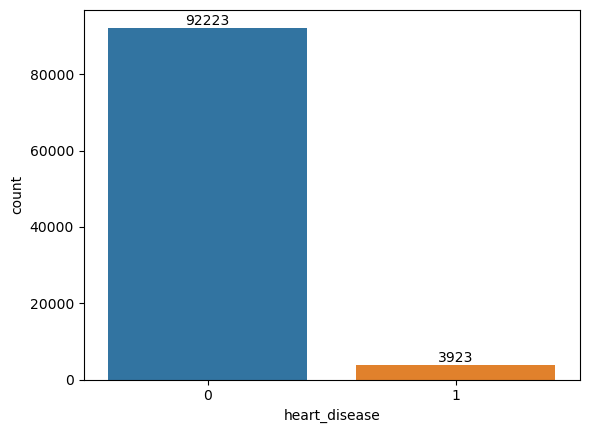

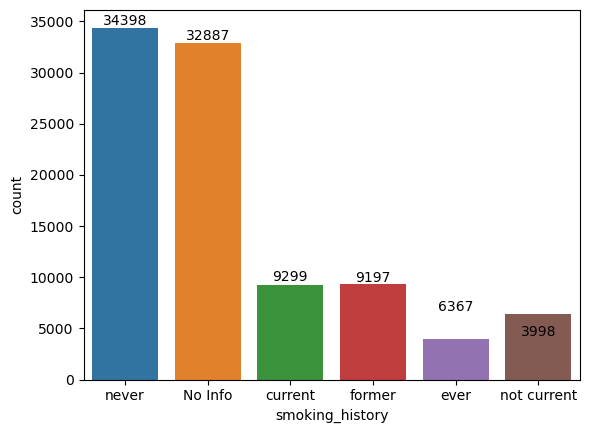

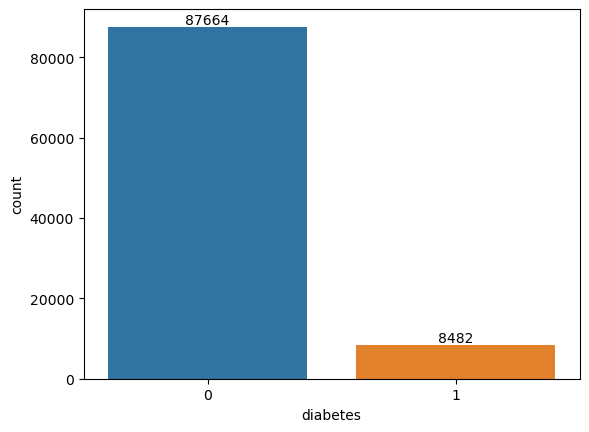

In [12]:
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']

for column in categorical_columns:
    sns.countplot(x=column, data=df)
    
    # Hiển thị số lượng chi tiết trên từng cột
    counts = df[column].value_counts()
    for i, count in enumerate(counts):
        plt.text(i, count, str(count), ha='center', va='bottom')
    plt.show()

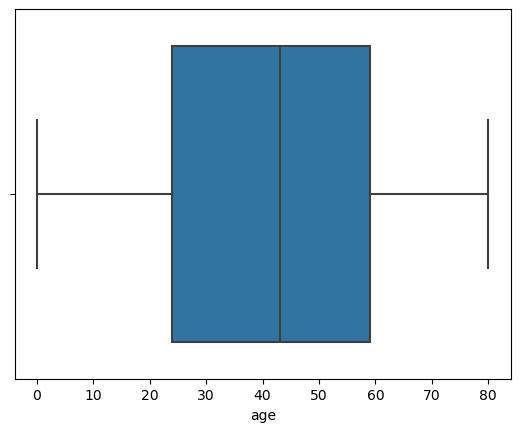

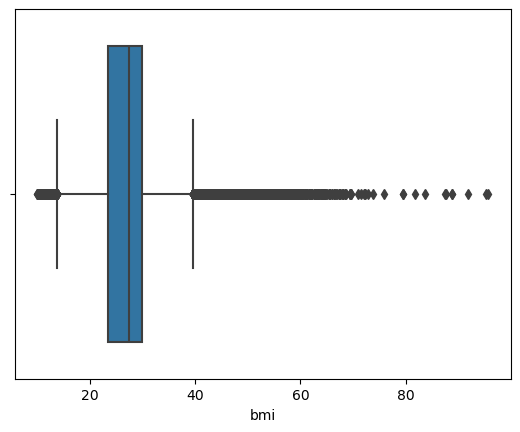

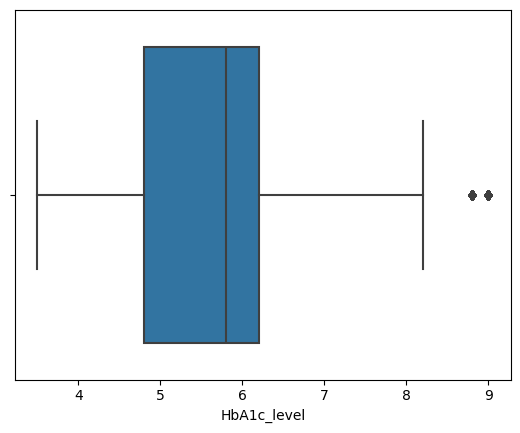

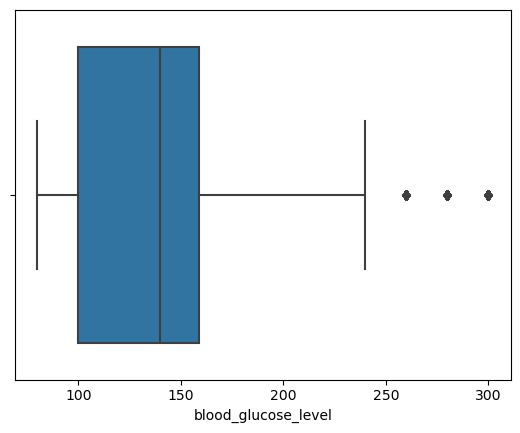

In [13]:
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for column in numerical_columns:
    sns.boxplot(x=column, data=df)
    # plt.savefig(f"{column}_plotbox.png")
    plt.show()

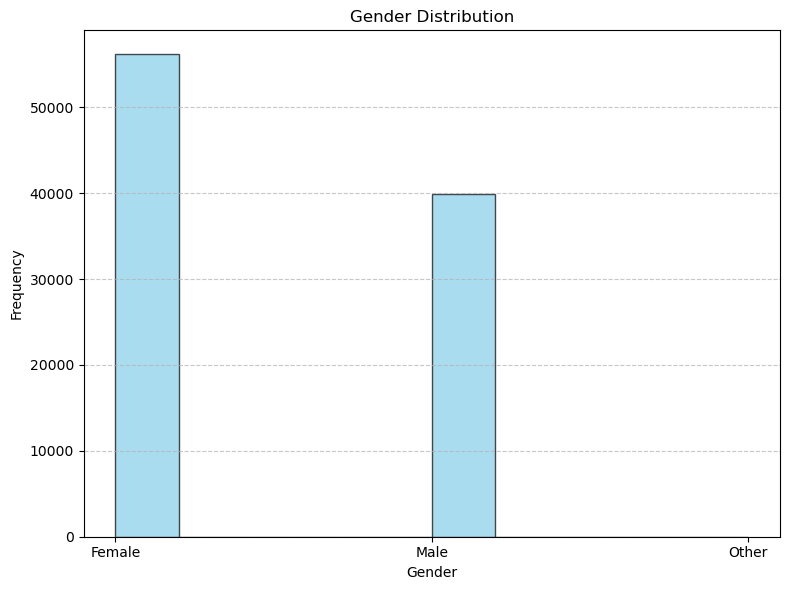

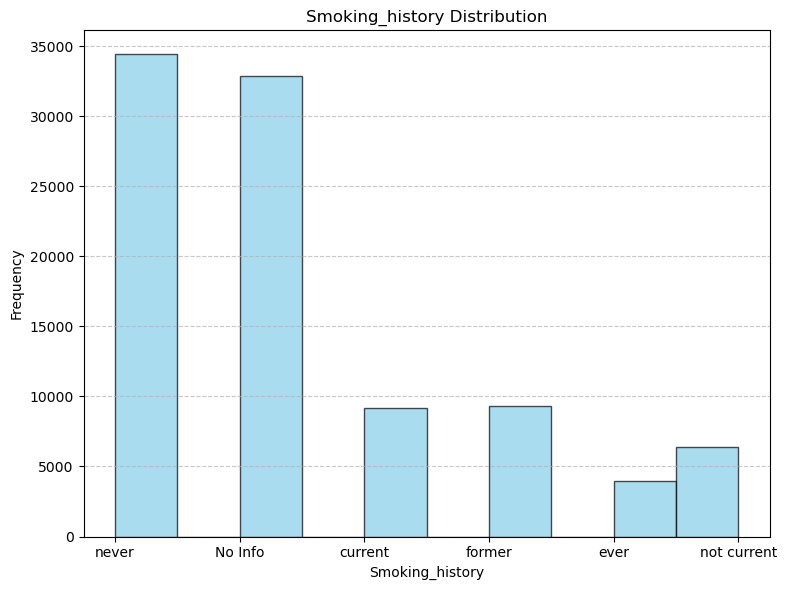

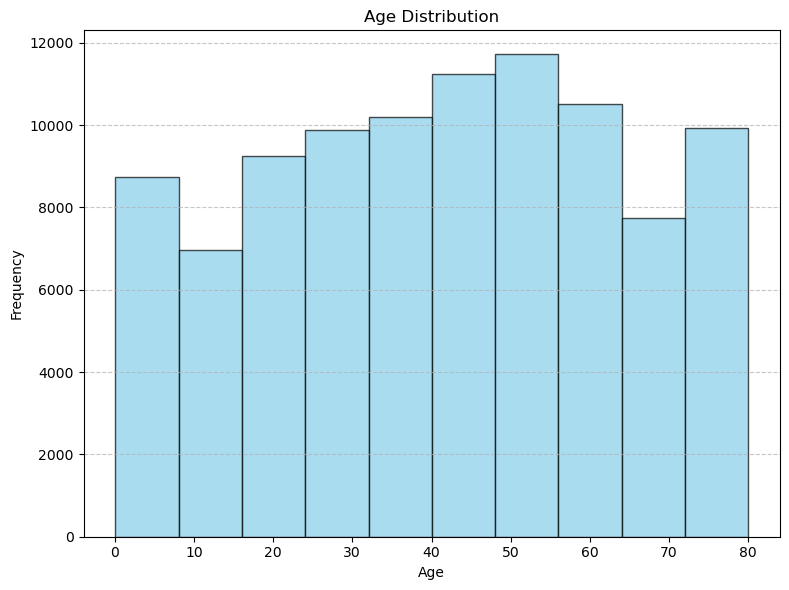

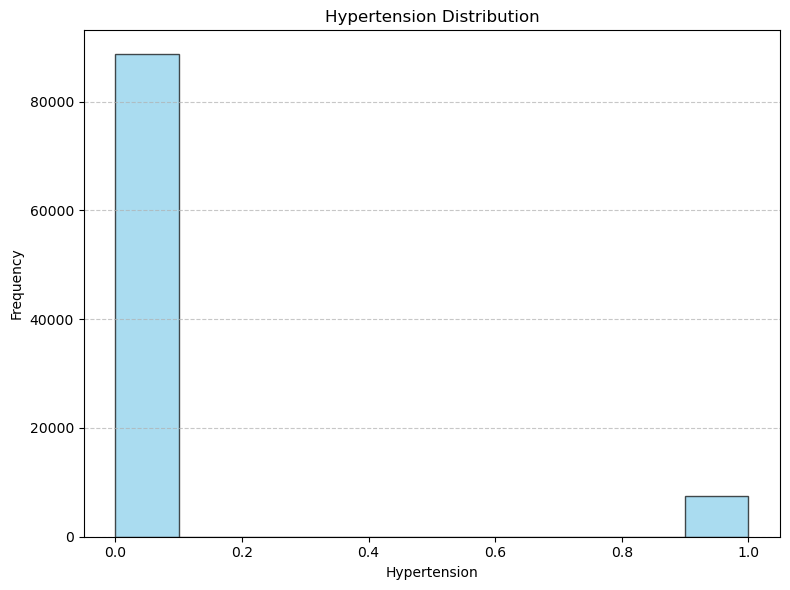

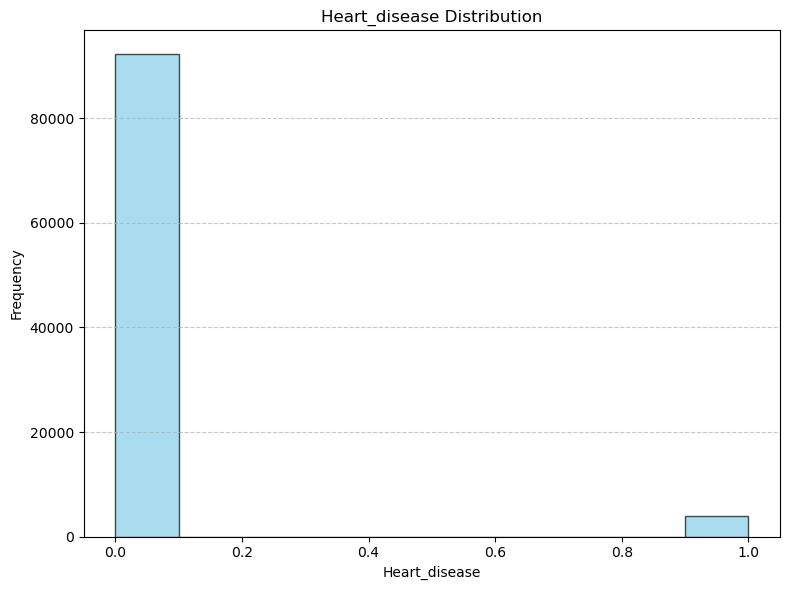

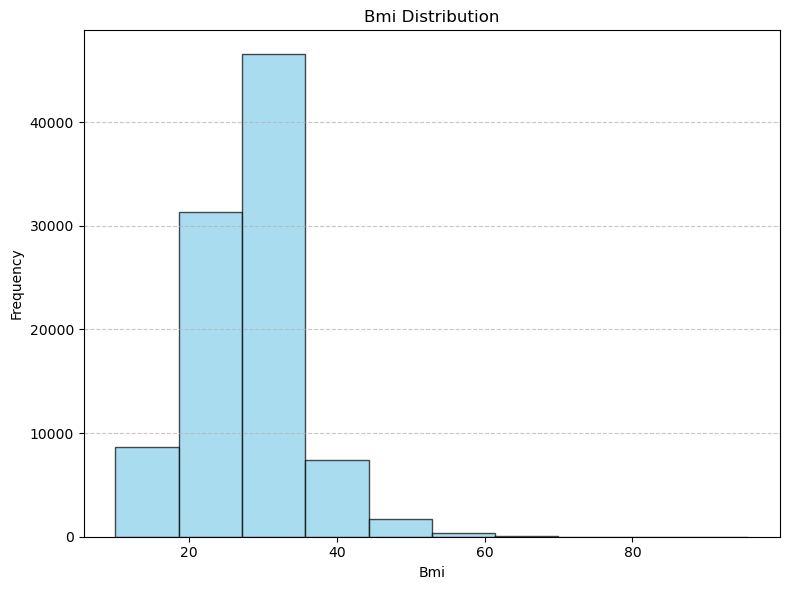

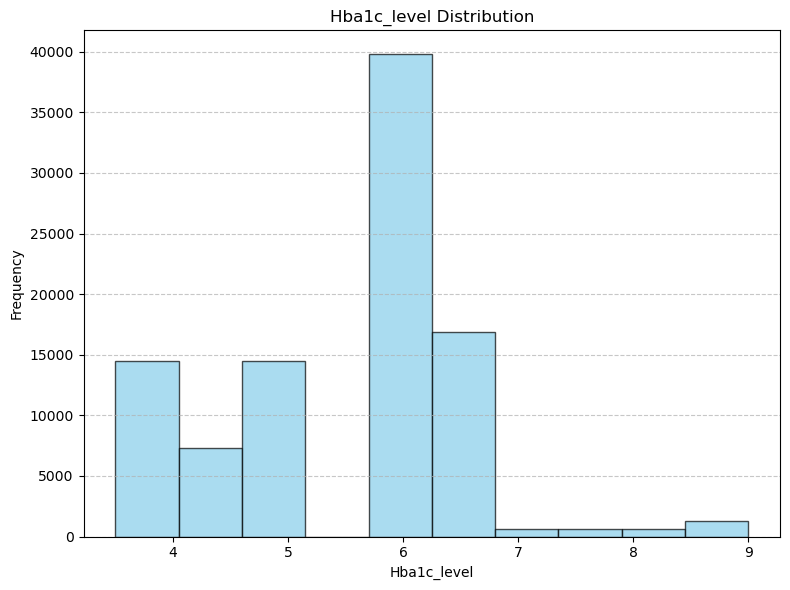

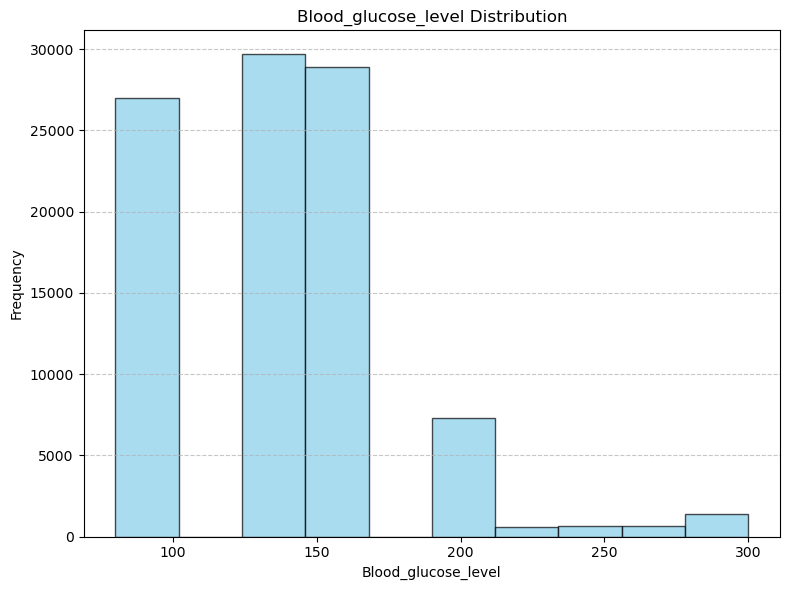

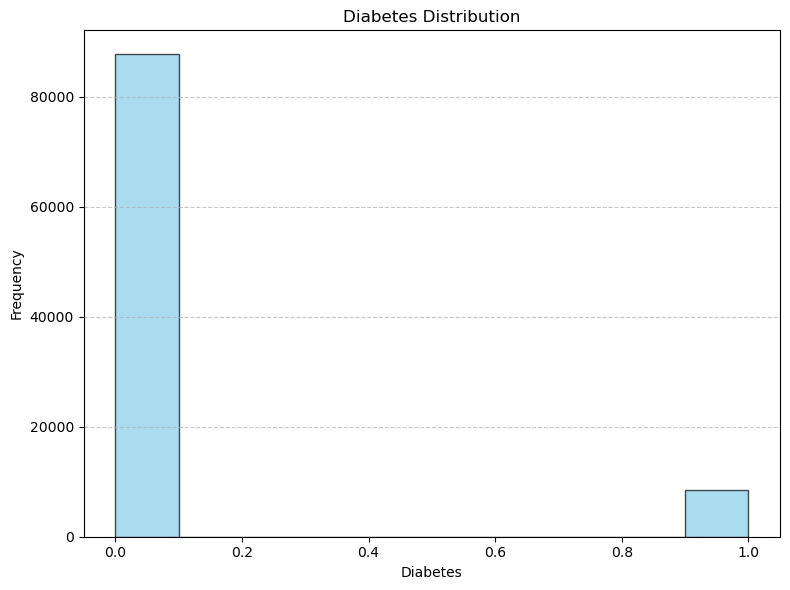

In [15]:
cot = ['gender', 'smoking_history', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
for attribute in cot:
    plt.figure(figsize=(8, 6))
    plt.hist(df[attribute], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'{attribute.capitalize()} Distribution')
    plt.xlabel(attribute.capitalize())
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'{attribute}_histogram.png')
    plt.show()

## Gender and diabetes

In [7]:
df.groupby(['gender', 'diabetes']).age.count().reset_index(name = 'counts')

,gender,diabetes,counts
0,Female,0,51714
1,Female,1,4447
2,Male,0,35932
3,Male,1,4035
4,Other,0,18


In [8]:
pd.crosstab(df.diabetes, df.gender, margins = True)

gender,Female,Male,Other,All
diabetes,,,,
0,51714,35932,18,87664
1,4447,4035,0,8482
All,56161,39967,18,96146


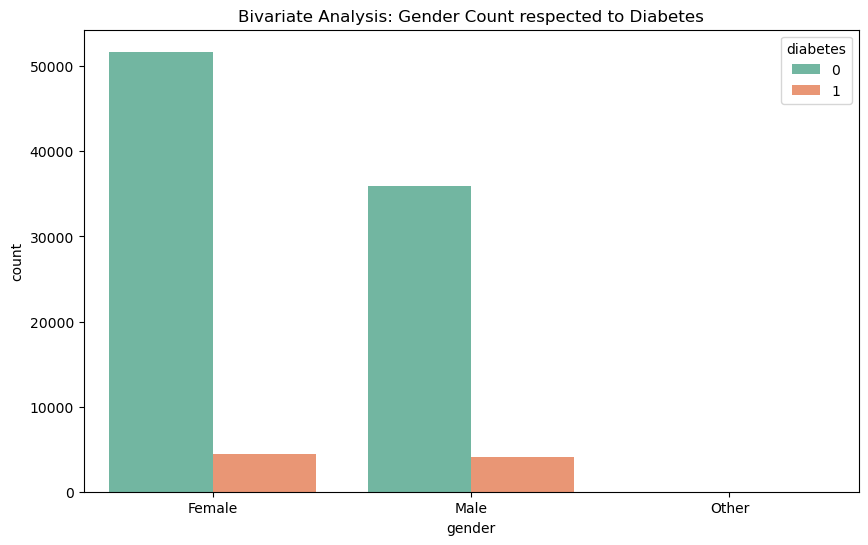

In [10]:
df['diabetes'] = df['diabetes'].astype(str)

plt.figure(figsize=(10, 6), dpi=100)
sns.countplot(data=df, x='gender', hue='diabetes', palette='Set2')
plt.title("Bivariate Analysis: Gender Count respected to Diabetes")
plt.show()

In [11]:
P_dia_female = 4447 / 56161
P_dia_others = 4035 / (39967 + 18)

print(f"The percentage of having diabetes given by being Female: {np.round(100 * P_dia_female, 2)}%")
print(f"The percentage of having no diabetes given by being Female: {np.round(100 * (1 - P_dia_female), 2)}%")
print("--------------------------------------------------")
print(f"The percentage of having diabetes given by other variables: {np.round(100 * P_dia_others, 2)}%")
print(f"The percentage of having no diabetes given by other variables: {np.round(100 * (1 - P_dia_others), 2)}%")

The percentage of having diabetes given by being Female: 7.92%
The percentage of having no diabetes given by being Female: 92.08%
--------------------------------------------------
The percentage of having diabetes given by other variables: 10.09%
The percentage of having no diabetes given by other variables: 89.91%


## age and diabetes

Text(13.819444444444445, 0.5, 'Age')

<Figure size 1000x1200 with 0 Axes>

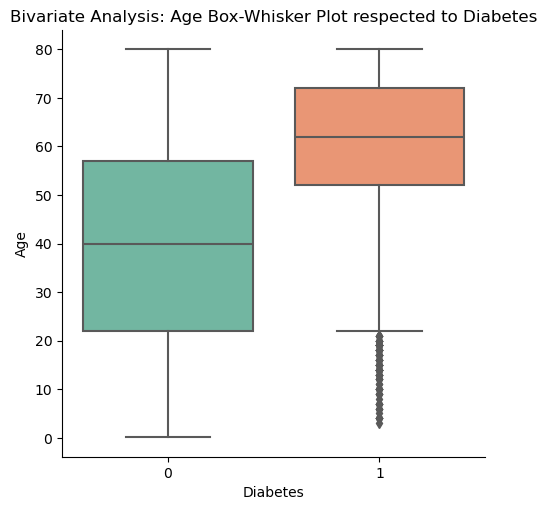

In [12]:
plt.figure(figsize = (10, 12), dpi = 100)
sns.catplot(data = df, x = 'diabetes', y = 'age', 
            kind = 'box', palette = 'Set2', orient = 'v')
plt.title("Bivariate Analysis: Age Box-Whisker Plot respected to Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Age")

## Hypertension and diabetes

In [13]:
df.groupby(['diabetes', 'hypertension']).age.count().reset_index(name = 'counts')

,diabetes,hypertension,counts
0,0,0,82289
1,0,1,5375
2,1,0,6396
3,1,1,2086


In [14]:
pd.crosstab(df.diabetes, df.hypertension, margins = True)

hypertension,0,1,All
diabetes,,,
0,82289,5375,87664
1,6396,2086,8482
All,88685,7461,96146


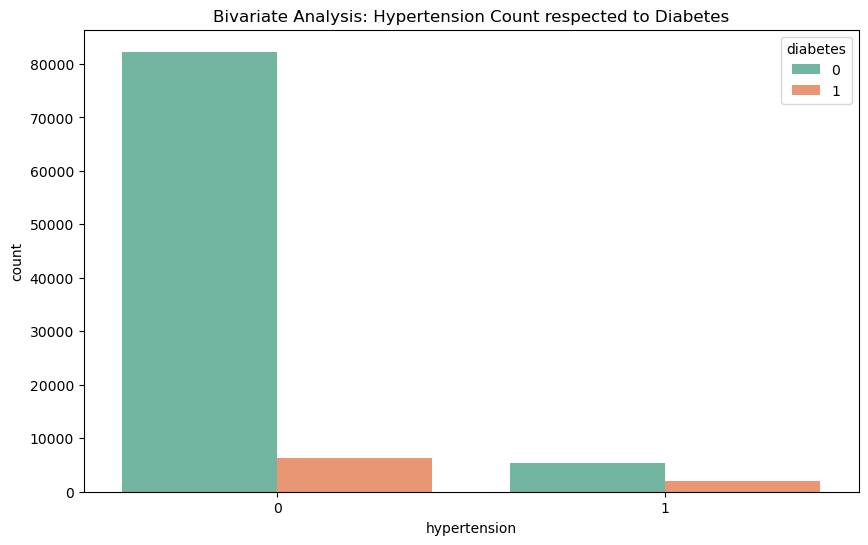

In [15]:
plt.figure(figsize = (10, 6), dpi = 100)
sns.countplot(data = df, x = 'hypertension', hue = 'diabetes', palette = 'Set2')
plt.title("Bivariate Analysis: Hypertension Count respected to Diabetes")
plt.show()

In [16]:
print(f"The percentage of having diabetes with hypertension: {np.round(100 * (2086 / 7461), 2)}%")
print(f"The percentage of having no diabetes with hypertension: {np.round(100 * (5375 / 7461), 2)}%")
print("--------------------------------------------------")
print(f"The percentage of having diabetes without hypertension: {np.round(100 * (6396 / 88685), 2)}%")
print(f"The percentage of having no diabetes without hypertension: {np.round(100 * (82289 / 88685), 2)}%")

The percentage of having diabetes with hypertension: 27.96%
The percentage of having no diabetes with hypertension: 72.04%
--------------------------------------------------
The percentage of having diabetes without hypertension: 7.21%
The percentage of having no diabetes without hypertension: 92.79%


## Heart Disease

In [17]:
df.groupby(['diabetes', 'heart_disease']).age.count().reset_index(name = 'counts')

,diabetes,heart_disease,counts
0,0,0,85008
1,0,1,2656
2,1,0,7215
3,1,1,1267


In [18]:
pd.crosstab(df.diabetes, df.heart_disease, margins = True)

heart_disease,0,1,All
diabetes,,,
0,85008,2656,87664
1,7215,1267,8482
All,92223,3923,96146


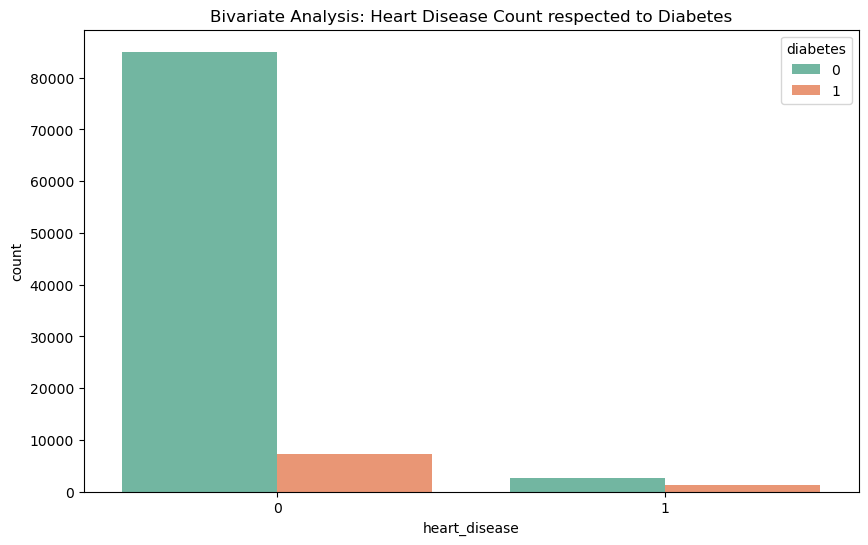

In [19]:
plt.figure(figsize = (10, 6), dpi = 100)
sns.countplot(data = df, x = 'heart_disease', hue = 'diabetes', palette = 'Set2')
plt.title("Bivariate Analysis: Heart Disease Count respected to Diabetes")
plt.show()

In [20]:
print(f"The percentage of having diabetes with heart_disease: {np.round(100 * (1267 / 3923), 2)}%")
print(f"The percentage of having no diabetes with heart_disease: {np.round(100 * (2656 / 3923), 2)}%")
print("--------------------------------------------------")
print(f"The percentage of having diabetes without heart_disease: {np.round(100 * (7215 / 92223), 2)}%")
print(f"The percentage of having no diabetes without heart_disease: {np.round(100 * (85008 / 92223), 2)}%")

The percentage of having diabetes with heart_disease: 32.3%
The percentage of having no diabetes with heart_disease: 67.7%
--------------------------------------------------
The percentage of having diabetes without heart_disease: 7.82%
The percentage of having no diabetes without heart_disease: 92.18%


## Smoking History

In [21]:
df.groupby(['diabetes', 'smoking_history']).age.count().reset_index(name = 'counts')

,diabetes,smoking_history,counts
0,0,No Info,31442
1,0,current,8249
2,0,ever,3526
3,0,former,7709
4,0,never,31061
5,0,not current,5677
6,1,No Info,1445
7,1,current,948
8,1,ever,472
9,1,former,1590


In [22]:
pd.crosstab(df.diabetes, df.smoking_history, margins = True)

smoking_history,No Info,current,ever,former,never,not current,All
diabetes,,,,,,,
0,31442,8249,3526,7709,31061,5677,87664
1,1445,948,472,1590,3337,690,8482
All,32887,9197,3998,9299,34398,6367,96146


In [24]:
pd.crosstab(df.diabetes, df.smoking_history, margins = True, normalize = True)

smoking_history,No Info,current,ever,former,never,not current,All
diabetes,,,,,,,
0,0.327023,0.085797,0.036673,0.080180,0.323061,0.059046,0.91178
1,0.015029,0.009860,0.004909,0.016537,0.034708,0.007177,0.08822
All,0.342053,0.095657,0.041583,0.096717,0.357768,0.066222,1.00000


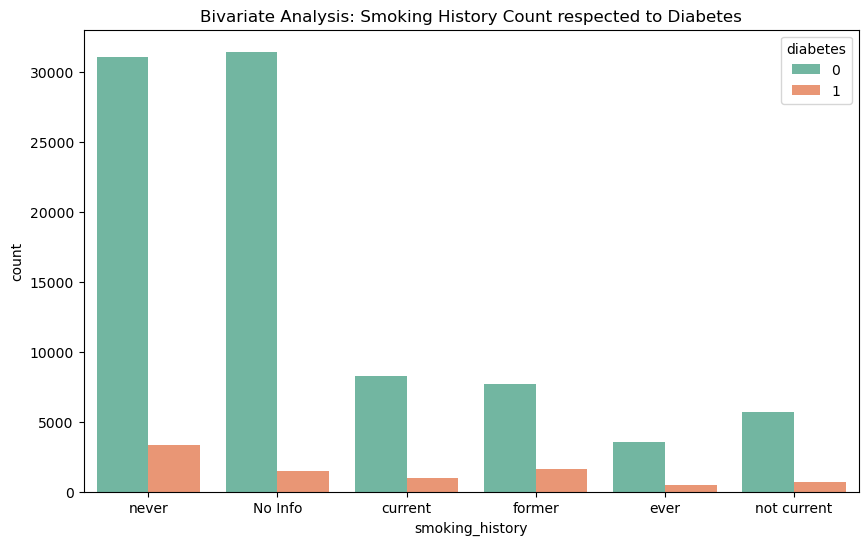

In [25]:
plt.figure(figsize = (10, 6), dpi = 100)
sns.countplot(data = df, x = 'smoking_history', hue = 'diabetes', palette = 'Set2')
plt.title("Bivariate Analysis: Smoking History Count respected to Diabetes")
plt.show()

## bmi

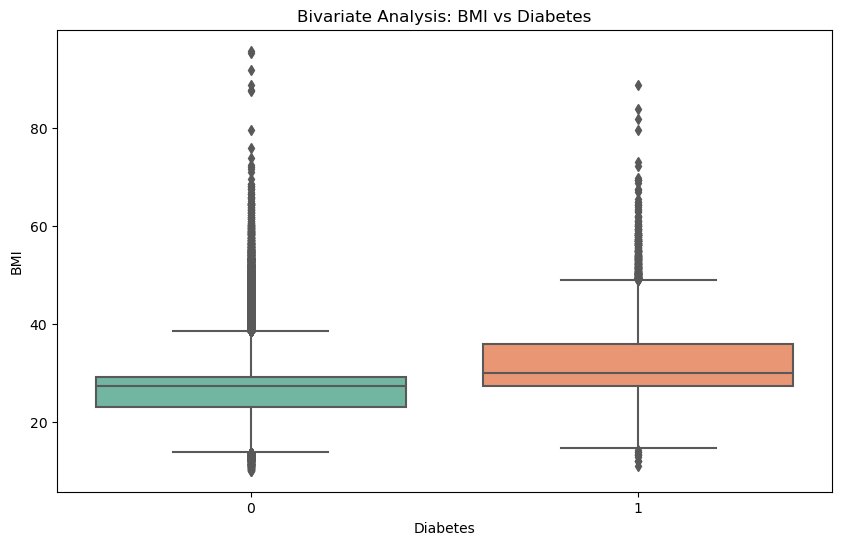

In [26]:
plt.figure(figsize = (10, 6), dpi = 100)
sns.boxplot(data = df, x = 'diabetes', y = 'bmi', orient = "v", palette = 'Set2')
plt.title("Bivariate Analysis: BMI vs Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("BMI")
plt.show()

## HbA1C Level

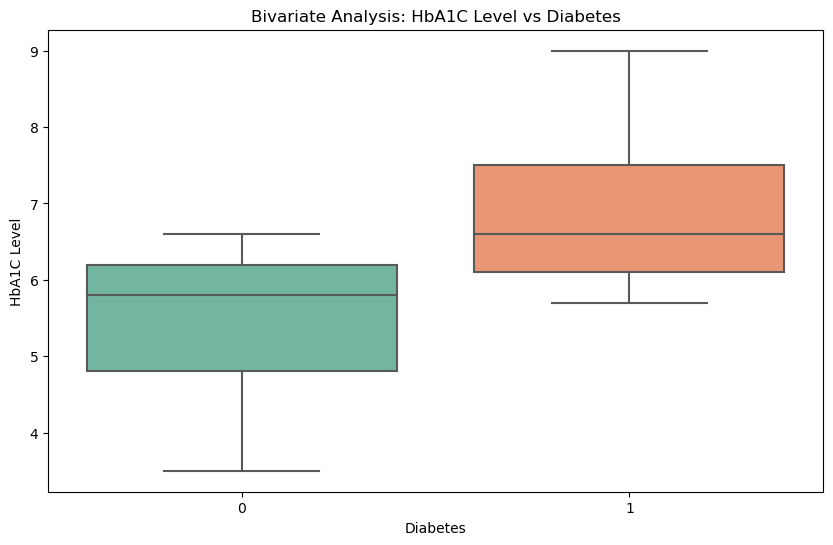

In [27]:
plt.figure(figsize = (10, 6), dpi = 100)
sns.boxplot(data = df, x = 'diabetes', y = 'HbA1c_level', orient = "v", palette = 'Set2')
plt.title("Bivariate Analysis: HbA1C Level vs Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("HbA1C Level")
plt.show()

## Blood Glucose Level

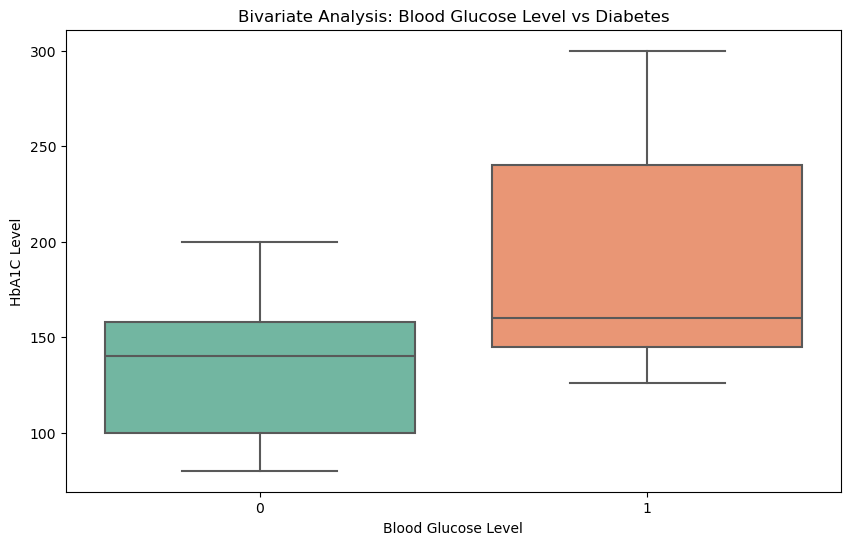

In [28]:
plt.figure(figsize = (10, 6), dpi = 100)
sns.boxplot(data = df, x = 'diabetes', y = 'blood_glucose_level', orient = "v", palette = 'Set2')
plt.title("Bivariate Analysis: Blood Glucose Level vs Diabetes")
plt.xlabel("Blood Glucose Level")
plt.ylabel("HbA1C Level")
plt.show()

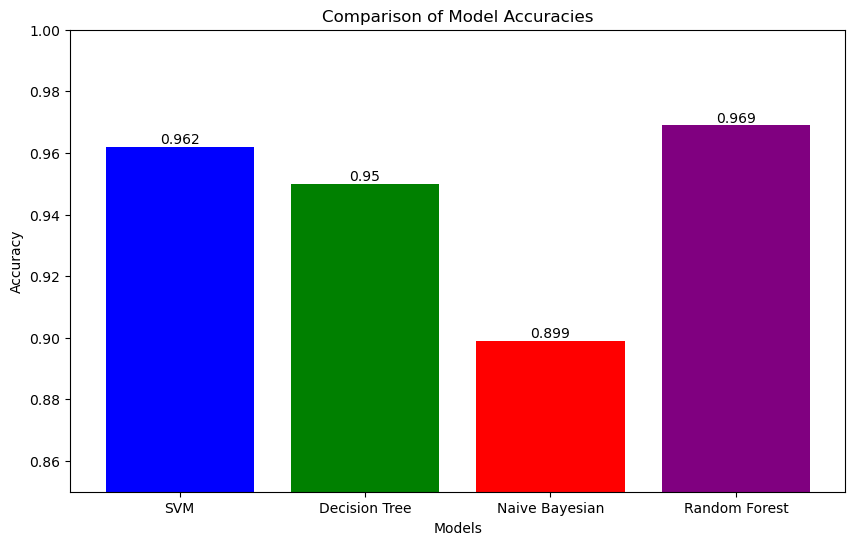

In [5]:
import matplotlib.pyplot as plt

# Độ chính xác của từng mô hình
models = ['SVM', 'Decision Tree', 'Naive Bayesian', 'Random Forest']
accuracies = [0.962, 0.95, 0.899, 0.969]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])

# Hiển thị số lên từng cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.85, 1.0)  # Đặt giới hạn trục y
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
